In [40]:
import pandas as pd
import numpy as np
import statistics
from datetime import datetime
import datetime
import random
import itertools
from scipy.stats import norm
#import seaborn as sns
import math
import random
import sklearn
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [41]:
#Lauras path
#data= pd.read_csv(r'C:\Users\moreno.l.5\Procter and Gamble\Idigoras, Anne - Project\Shipments\total shipments.csv')
#Annes path
df= pd.read_csv(r'C:\Users\moreno.l.5\Procter and Gamble\Idigoras, Anne - Project\Shipments\Shipments_Fab_Hair_Baby_Oral_Fem_Home_22_24.csv')

df = df.drop(columns=['Category'])
df= df.rename(columns={'Day Date (Real)': 'Date'})
categories = df['Sub Sector'].unique()
#df = df[df['Sub Sector'] == 'FABRIC']
df.head()


,Sub Sector,Shipment MSU Internal,Date
0,HOME,2.4923,2022-01-03 00:00:00
1,HOME,0.4905,2022-01-04 00:00:00
2,HOME,0.3972,2022-01-05 00:00:00
3,HOME,0.9810,2022-01-07 00:00:00
4,HOME,0.2207,2022-01-08 00:00:00


In [42]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

print(df)

      Sub Sector  Shipment MSU Internal       Date
0           HOME                 2.4923 2022-01-03
1           HOME                 0.4905 2022-01-04
2           HOME                 0.3972 2022-01-05
3           HOME                 0.9810 2022-01-07
4           HOME                 0.2207 2022-01-08
...          ...                    ...        ...
14049   FEMININE                 1.1804 2024-06-07
14050   FEMININE                 0.1575 2024-06-10
14051   FEMININE                 0.3791 2024-06-11
14052   FEMININE                 0.5446 2024-06-12
14053   FEMININE                 0.1394 2024-06-13

[14054 rows x 3 columns]


In [43]:

# Pivot the DataFrame
df = df.pivot_table(index='Date', columns='Sub Sector', values='Shipment MSU Internal', aggfunc='sum')
# Fill NaN values with 0
df= df.fillna(0)
print(df)


Sub Sector     BABY   FABRIC  FEMININE     HAIR    HOME    ORAL
Date                                                           
2022-01-03  10.1881  12.5983    8.0291  12.2046  8.9403  2.3360
2022-01-04   2.5806   6.8322    1.9902   3.6671  3.6255  1.3645
2022-01-05   3.8445   9.9248    2.4040   2.4512  3.5580  0.9582
2022-01-06   0.0071   0.0000    0.0000   0.0000  0.0000  0.0088
2022-01-07   5.5063   9.5818    4.0834   6.1986  5.4640  2.9533
...             ...      ...       ...      ...     ...     ...
2024-06-07   6.8245   7.0239    4.2874  17.6560  6.4882  2.4478
2024-06-10   0.9587   0.7927    0.7111   0.4979  0.7241  0.1300
2024-06-11   2.4614   4.3864    2.2884  10.0238  4.6485  0.9708
2024-06-12   6.8980   5.8006    3.5366  11.6253  2.2974  1.0309
2024-06-13   0.9952   3.4611    0.6438   7.4712  1.2283  0.5726

[718 rows x 6 columns]


In [44]:
df = df.resample('W').sum()

print(df)


Sub Sector     BABY   FABRIC  FEMININE     HAIR     HOME     ORAL
Date                                                             
2022-01-09  22.9573  41.0606   17.4256  24.5215  22.1852   7.6208
2022-01-16  25.3695  31.5509   14.3016  11.5940  18.3677  10.3878
2022-01-23  24.1727  42.6518   15.3453  21.6314  18.1934   7.1697
2022-01-30  18.1986  31.6521   12.8897  37.4259  14.8295   4.2585
2022-02-06  22.9444  29.4992   14.4878  24.4354  12.0999   7.5424
...             ...      ...       ...      ...      ...      ...
2024-05-19  20.7189  24.5351   16.5308  20.3170  13.9944   4.9812
2024-05-26  20.0923  24.1139   18.9659  20.8942  13.7757   6.3642
2024-06-02  22.0068  13.7497   14.1853  14.4001  13.3423   6.0398
2024-06-09  20.9083  16.7014   16.9303  37.8091  13.8545   5.4071
2024-06-16  11.3133  14.4408    7.1799  29.6182   8.8983   2.7043

[128 rows x 6 columns]


In [45]:
df = df.reset_index()

09:59:14 - cmdstanpy - INFO - Chain [1] start processing
09:59:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
09:59:16 - cmdstanpy - INFO - Chain [1] start processing
09:59:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
09:59:17 - cmdstanpy - INFO - Chain [1] start processing
09:59:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

               FABRIC       BABY       HAIR        FEM       HOME      ORAL
2024-06-30  21.861866  14.904474  18.710419  13.092923  13.075749  4.016835
2024-07-31  21.036730  22.368550  25.186495  15.965542  14.948434  4.814953
2024-08-31  25.418343  12.952891  19.638439   9.771091  12.196811  3.987693
2024-09-30  20.893904  15.649745  23.965303  12.984121  15.599524  4.699627
2024-10-31  24.042584  16.006437  19.046725  10.808723  12.264352  6.735004
2024-11-30  23.945186  20.227876  21.061252  13.191518  14.978266  5.385344
2024-12-31  14.646940   9.696121  11.644221   8.799959   7.368409  5.196105
2025-01-31  24.196614  16.325591  21.321663  15.379760  12.930546  5.905641
2025-02-28  17.709967  16.628935  17.161601  11.938445  12.312264  4.969514
2025-03-31  16.873165  14.761814  26.805977  12.789740  10.362464  4.333110
2025-04-30  20.968696  12.256999  18.621279  10.852882  10.297304  5.033002
2025-05-31  14.129275  15.348316  22.572640  14.214286   9.944331  3.953662


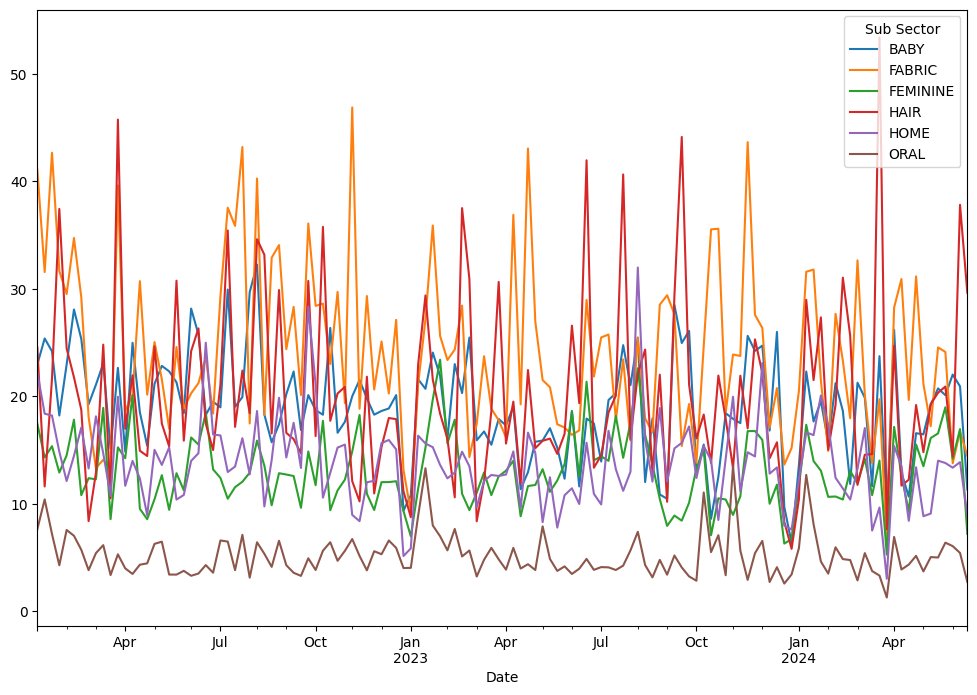

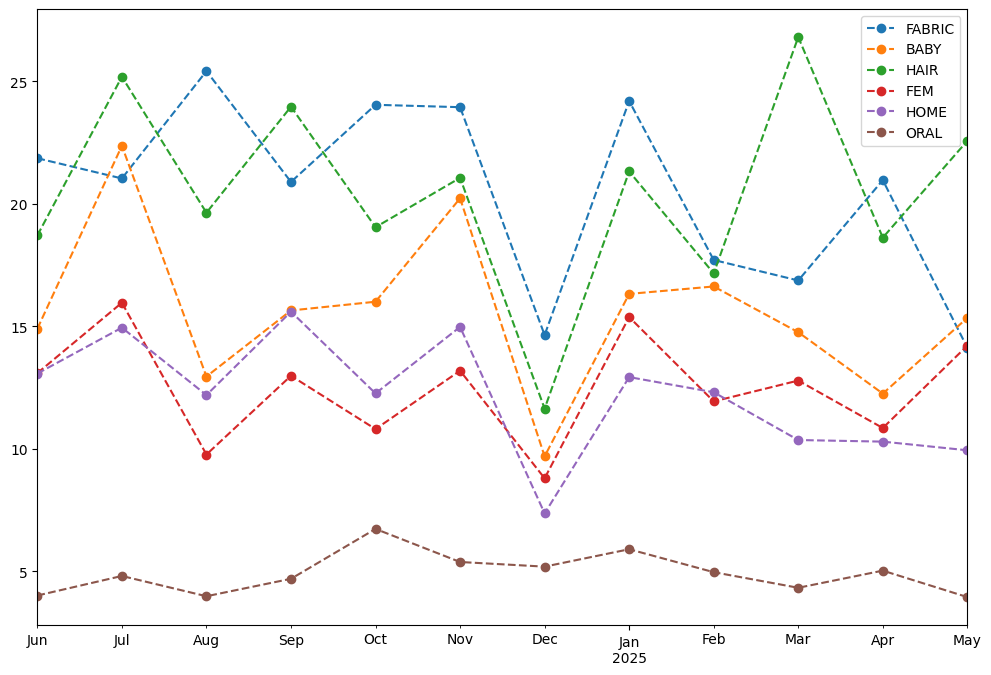

In [46]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Define the hierarchy based on the individual subgroups
hierarchy = {'FABRIC': ['FABRIC'], 'BABY': ['BABY'], 'HAIR': ['HAIR'], 'FEM':['FEMININE'], 'HOME':['HOME'],'ORAL':['ORAL']}

# Prepare the data
y = df.set_index('Date')

# Perform hierarchical time series forecasting
forecast = pd.DataFrame()

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    model = Prophet()
    model.fit(group_data)
    
    future = model.make_future_dataframe(periods=12, freq='M')
    group_forecast = model.predict(future)
    
    forecast[group] = group_forecast['yhat'].tail(12)

# Set the index of the forecast DataFrame
last_date = y.index[-1]
forecast.index = pd.date_range(start=last_date, periods=12, freq='M')

print(forecast)

# Plot the historical data
y.plot(figsize=(12, 8))

# Plot the forecasts
forecast.plot(figsize=(12, 8), linestyle='--', marker='o')

plt.show()


09:59:52 - cmdstanpy - INFO - Chain [1] start processing
09:59:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
09:59:53 - cmdstanpy - INFO - Chain [1] start processing
09:59:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
09:59:54 - cmdstanpy - INFO - Chain [1] start processing
09:59:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Average MAPE for FABRIC: 60.03%


09:59:57 - cmdstanpy - INFO - Chain [1] start processing
09:59:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
09:59:58 - cmdstanpy - INFO - Chain [1] start processing
09:59:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
09:59:58 - cmdstanpy - INFO - Chain [1] start processing
09:59:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Average MAPE for BABY: 24.36%


10:00:01 - cmdstanpy - INFO - Chain [1] start processing
10:00:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:02 - cmdstanpy - INFO - Chain [1] start processing
10:00:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:03 - cmdstanpy - INFO - Chain [1] start processing
10:00:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Average MAPE for HAIR: 38.20%


10:00:06 - cmdstanpy - INFO - Chain [1] start processing
10:00:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:07 - cmdstanpy - INFO - Chain [1] start processing
10:00:07 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:08 - cmdstanpy - INFO - Chain [1] start processing
10:00:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Average MAPE for FEM: 34.06%


10:00:11 - cmdstanpy - INFO - Chain [1] start processing
10:00:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:12 - cmdstanpy - INFO - Chain [1] start processing
10:00:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:13 - cmdstanpy - INFO - Chain [1] start processing
10:00:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Average MAPE for HOME: 44.92%


10:00:15 - cmdstanpy - INFO - Chain [1] start processing
10:00:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:16 - cmdstanpy - INFO - Chain [1] start processing
10:00:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:17 - cmdstanpy - INFO - Chain [1] start processing
10:00:18 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Average MAPE for ORAL: 77.55%


10:00:20 - cmdstanpy - INFO - Chain [1] start processing
10:00:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:21 - cmdstanpy - INFO - Chain [1] start processing
10:00:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:00:22 - cmdstanpy - INFO - Chain [1] start processing
10:00:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

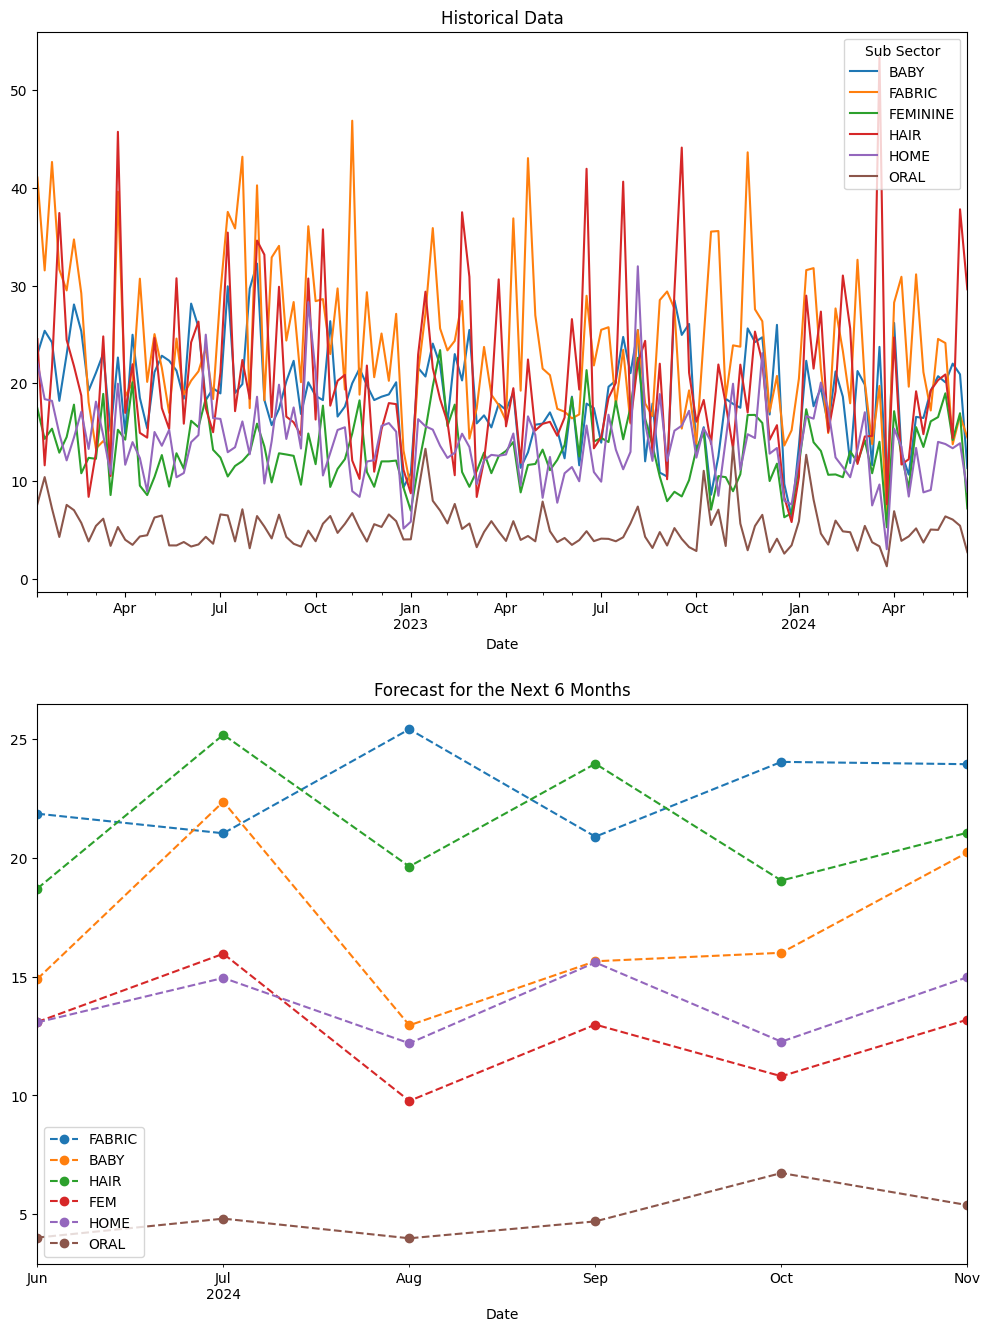

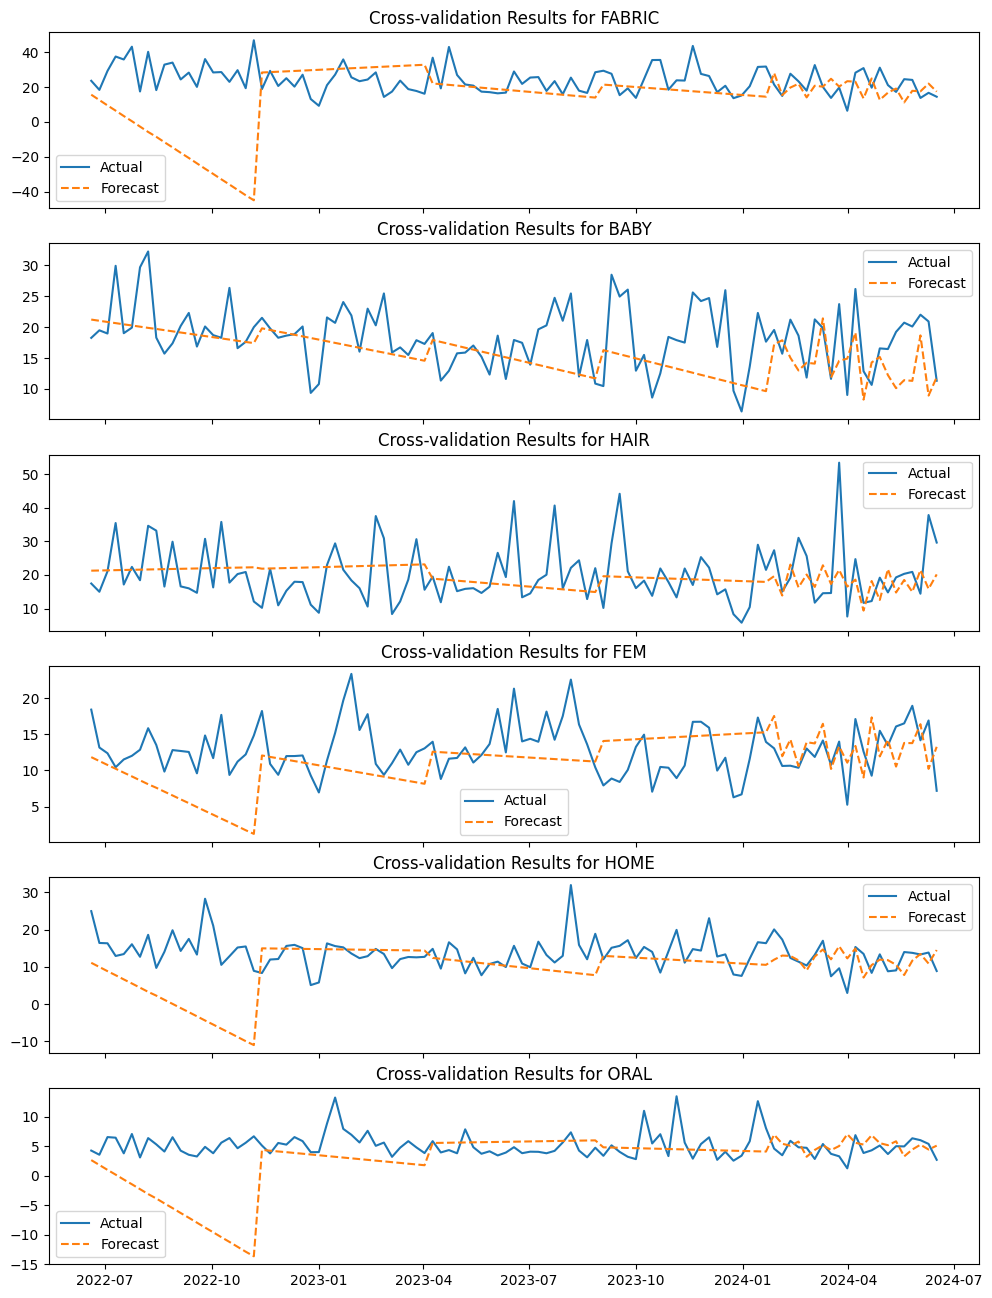

In [47]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows with missing values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Define the hierarchy based on the individual subgroups
hierarchy = {'FABRIC': ['FABRIC'], 'BABY': ['BABY'], 'HAIR': ['HAIR'],'FEM':['FEMININE'], 'HOME':['HOME'],'ORAL':['ORAL']}

# Prepare the data
y = df.set_index('Date')

# Function to fit Prophet model and calculate MAPE for cross-validation
def fit_prophet_model(train_data, test_data):
    model = Prophet()
    model.fit(train_data)
    
    future = model.make_future_dataframe(periods=len(test_data), freq='M')
    forecast = model.predict(future)
    
    return forecast['yhat'].tail(len(test_data))

# Perform cross-validation and calculate MAPE
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed
mape_dict = {}
cv_results = {}

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    mape_scores = []
    all_test_data = pd.DataFrame()
    all_forecast_data = pd.DataFrame()

    for train_index, test_index in tscv.split(group_data):
        train_data, test_data = group_data.iloc[train_index], group_data.iloc[test_index]
        forecast_values = fit_prophet_model(train_data, test_data)
        
        actual = test_data['y']
        mape = mean_absolute_percentage_error(actual, forecast_values)
        mape_scores.append(mape)
        
        test_data = test_data.copy()
        test_data['yhat'] = forecast_values.values
        all_test_data = pd.concat([all_test_data, test_data])
        all_forecast_data = pd.concat([all_forecast_data, forecast_values])

    # Calculate average MAPE for the group
    mape_dict[group] = sum(mape_scores) / len(mape_scores)
    print(f"Average MAPE for {group}: {mape_dict[group]:.2%}")
    
    cv_results[group] = all_test_data

# Generate forecast for the next 6 months
forecast = pd.DataFrame()

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    model = Prophet()
    model.fit(group_data)
    
    future = model.make_future_dataframe(periods=6, freq='M')
    group_forecast = model.predict(future)
    
    forecast[group] = group_forecast.set_index('ds')['yhat'].tail(6)

# Set the index of the forecast DataFrame to datetime
forecast.index = pd.to_datetime(forecast.index)
forecast.index.name = 'Date'

# Plot the historical data
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

y.plot(ax=axes[0], title="Historical Data")
forecast.plot(ax=axes[1], linestyle='--', marker='o', title="Forecast for the Next 6 Months")

# Plot cross-validation results
fig, ax = plt.subplots(len(hierarchy), 1, figsize=(12, 16), sharex=True)

for i, (group, cv_data) in enumerate(cv_results.items()):
    ax[i].plot(cv_data['ds'], cv_data['y'], label='Actual')
    ax[i].plot(cv_data['ds'], cv_data['yhat'], label='Forecast', linestyle='--')
    ax[i].set_title(f'Cross-validation Results for {group}')
    ax[i].legend()

plt.show()





10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:43:02 - cmdstanpy - INFO - Chain [1] start processing
10:43:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:43:04 - cmdstanpy - INFO - Chain [1] start processing
10:43:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for FABRIC: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, MAPE: 34.16%


11:00:24 - cmdstanpy - INFO - Chain [1] start processing
11:00:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:00:25 - cmdstanpy - INFO - Chain [1] start processing
11:00:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:00:27 - cmdstanpy - INFO - Chain [1] start processing
11:00:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for BABY: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, MAPE: 25.50%


11:16:51 - cmdstanpy - INFO - Chain [1] start processing
11:16:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:16:52 - cmdstanpy - INFO - Chain [1] start processing
11:16:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:16:53 - cmdstanpy - INFO - Chain [1] start processing
11:16:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for HAIR: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, MAPE: 38.12%


11:38:09 - cmdstanpy - INFO - Chain [1] start processing
11:38:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:38:11 - cmdstanpy - INFO - Chain [1] start processing
11:38:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:38:14 - cmdstanpy - INFO - Chain [1] start processing
11:38:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for FEM: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}, MAPE: 28.79%


12:11:22 - cmdstanpy - INFO - Chain [1] start processing
12:11:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:11:23 - cmdstanpy - INFO - Chain [1] start processing
12:11:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:11:24 - cmdstanpy - INFO - Chain [1] start processing
12:11:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for HOME: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}, MAPE: 32.21%


12:27:34 - cmdstanpy - INFO - Chain [1] start processing
12:27:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:27:37 - cmdstanpy - INFO - Chain [1] start processing
12:27:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:27:37 - cmdstanpy - INFO - Chain [1] start processing
12:27:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for ORAL: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}, MAPE: 41.09%


12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:28 - cmdstanpy - INFO - Chain [1] done processing
12:46:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Use

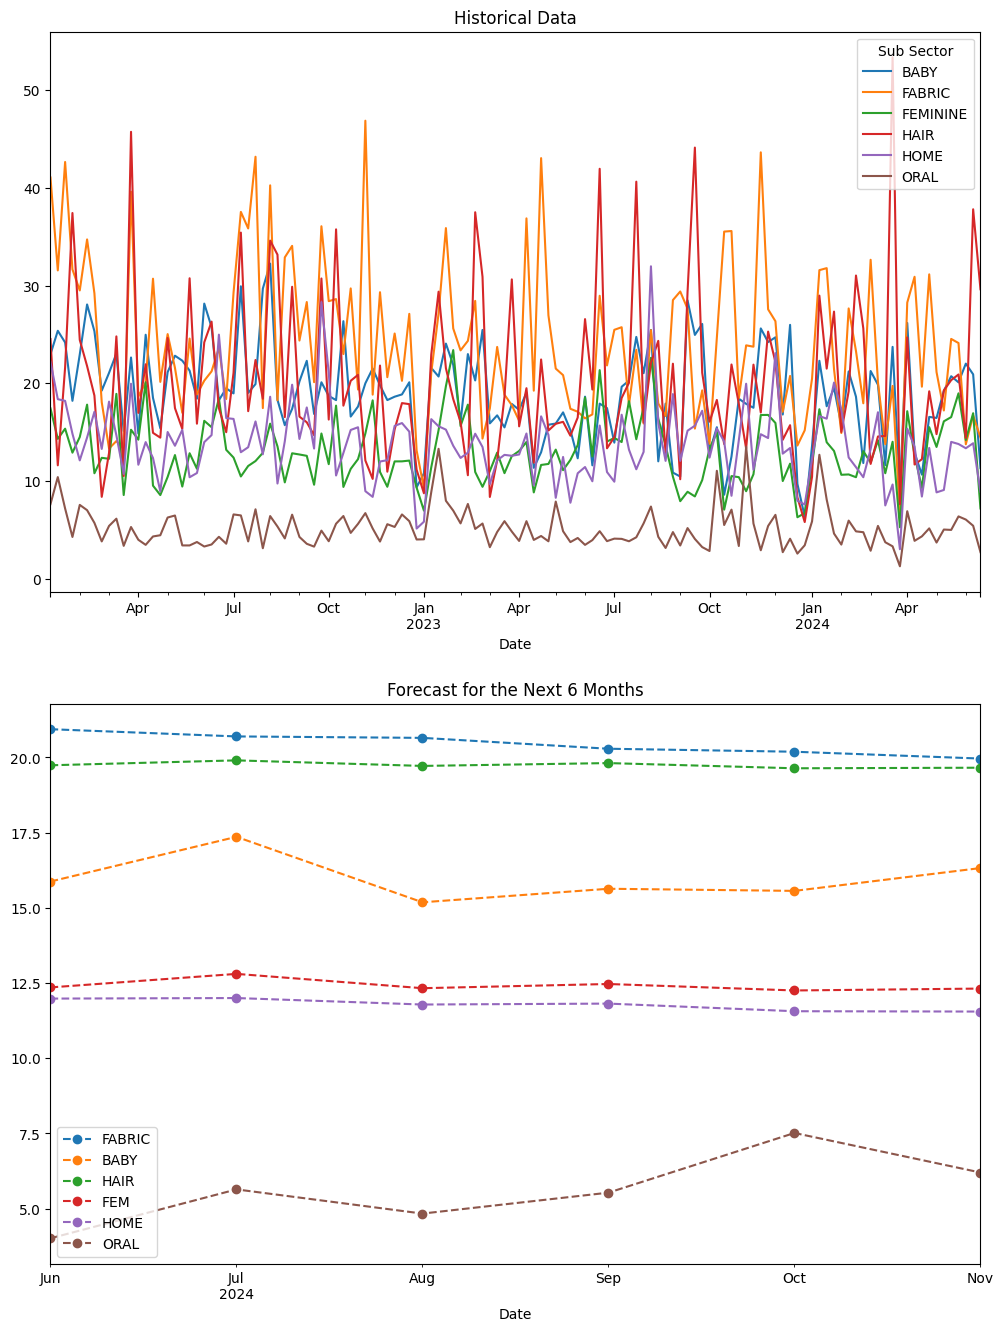

Final MAPE for FABRIC: 34.16%
Final MAPE for BABY: 25.50%
Final MAPE for HAIR: 38.12%
Final MAPE for FEM: 28.79%
Final MAPE for HOME: 32.21%
Final MAPE for ORAL: 41.09%


In [49]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is already defined and contains the necessary data
# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows with missing values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Define the hierarchy based on the individual subgroups
hierarchy = {'FABRIC': ['FABRIC'], 'BABY': ['BABY'], 'HAIR': ['HAIR'], 'FEM':['FEMININE'], 'HOME':['HOME'],'ORAL':['ORAL']}

# Prepare the data
y = df.set_index('Date')

# Hyperparameter grid
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Function to fit Prophet model and calculate MAPE for cross-validation
def fit_prophet_model(train_data, test_data, params):
    model = Prophet(
        seasonality_mode=params['seasonality_mode'],
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=True
    )
    model.fit(train_data)
    
    future = model.make_future_dataframe(periods=len(test_data), freq='M')
    forecast = model.predict(future)
    
    return forecast['yhat'].tail(len(test_data))

# Perform cross-validation and hyperparameter optimization
tscv = TimeSeriesSplit(n_splits=10)  # Adjust the number of splits as needed
best_params = {}
best_mape = {}

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    best_group_params = None
    best_group_mape = float('inf')
    
    for seasonality_mode in param_grid['seasonality_mode']:
        for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
            for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
                params = {
                    'seasonality_mode': seasonality_mode,
                    'changepoint_prior_scale': changepoint_prior_scale,
                    'seasonality_prior_scale': seasonality_prior_scale
                }
                mape_scores = []

                for train_index, test_index in tscv.split(group_data):
                    train_data, test_data = group_data.iloc[train_index], group_data.iloc[test_index]
                    forecast_values = fit_prophet_model(train_data, test_data, params)

                    actual = test_data['y']
                    mape = mean_absolute_percentage_error(actual, forecast_values)
                    mape_scores.append(mape)

                avg_mape = np.mean(mape_scores)

                if avg_mape < best_group_mape:
                    best_group_mape = avg_mape
                    best_group_params = params
    
    best_params[group] = best_group_params
    best_mape[group] = best_group_mape
    print(f"Best params for {group}: {best_group_params}, MAPE: {best_group_mape:.2%}")

# Generate forecast for the next 6 months using best hyperparameters
forecast = pd.DataFrame()

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    best_group_params = best_params[group]
    
    model = Prophet(
        seasonality_mode=best_group_params['seasonality_mode'],
        changepoint_prior_scale=best_group_params['changepoint_prior_scale'],
        seasonality_prior_scale=best_group_params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=True
    )
    model.fit(group_data)
    
    future = model.make_future_dataframe(periods=6, freq='M')
    group_forecast = model.predict(future)
    
    forecast[group] = group_forecast.set_index('ds')['yhat'].tail(6)

# Set the index of the forecast DataFrame to datetime
forecast.index = pd.to_datetime(forecast.index)
forecast.index.name = 'Date'

# Plot the historical data and forecast
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

y.plot(ax=axes[0], title="Historical Data")
forecast.plot(ax=axes[1], linestyle='--', marker='o', title="Forecast for the Next 6 Months")

plt.show()

# Print the best MAPE values
for group, mape in best_mape.items():
    print(f"Final MAPE for {group}: {mape:.2%}")





11:33:10 - cmdstanpy - INFO - Chain [1] start processing
11:33:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:33:11 - cmdstanpy - INFO - Chain [1] start processing
11:33:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:33:12 - cmdstanpy - INFO - Chain [1] start processing
11:33:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for FABRIC: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01}, MAPE: 47.44%


11:39:49 - cmdstanpy - INFO - Chain [1] start processing
11:39:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:39:50 - cmdstanpy - INFO - Chain [1] start processing
11:39:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:39:52 - cmdstanpy - INFO - Chain [1] start processing
11:39:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for BABY: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}, MAPE: 24.93%


11:45:10 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:45:11 - cmdstanpy - INFO - Chain [1] start processing
11:45:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:45:12 - cmdstanpy - INFO - Chain [1] start processing
11:45:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inste

Best params for HAIR: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, MAPE: 32.38%


11:49:35 - cmdstanpy - INFO - Chain [1] start processing
11:49:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:49:36 - cmdstanpy - INFO - Chain [1] start processing
11:49:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
11:49:37 - cmdstanpy - INFO - Chain [1] start processing
11:49:38 - cmdstanpy - INFO - Chain [1] done processing
11:49:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:49:38 - cmdstanpy - INFO - Chain [1] start

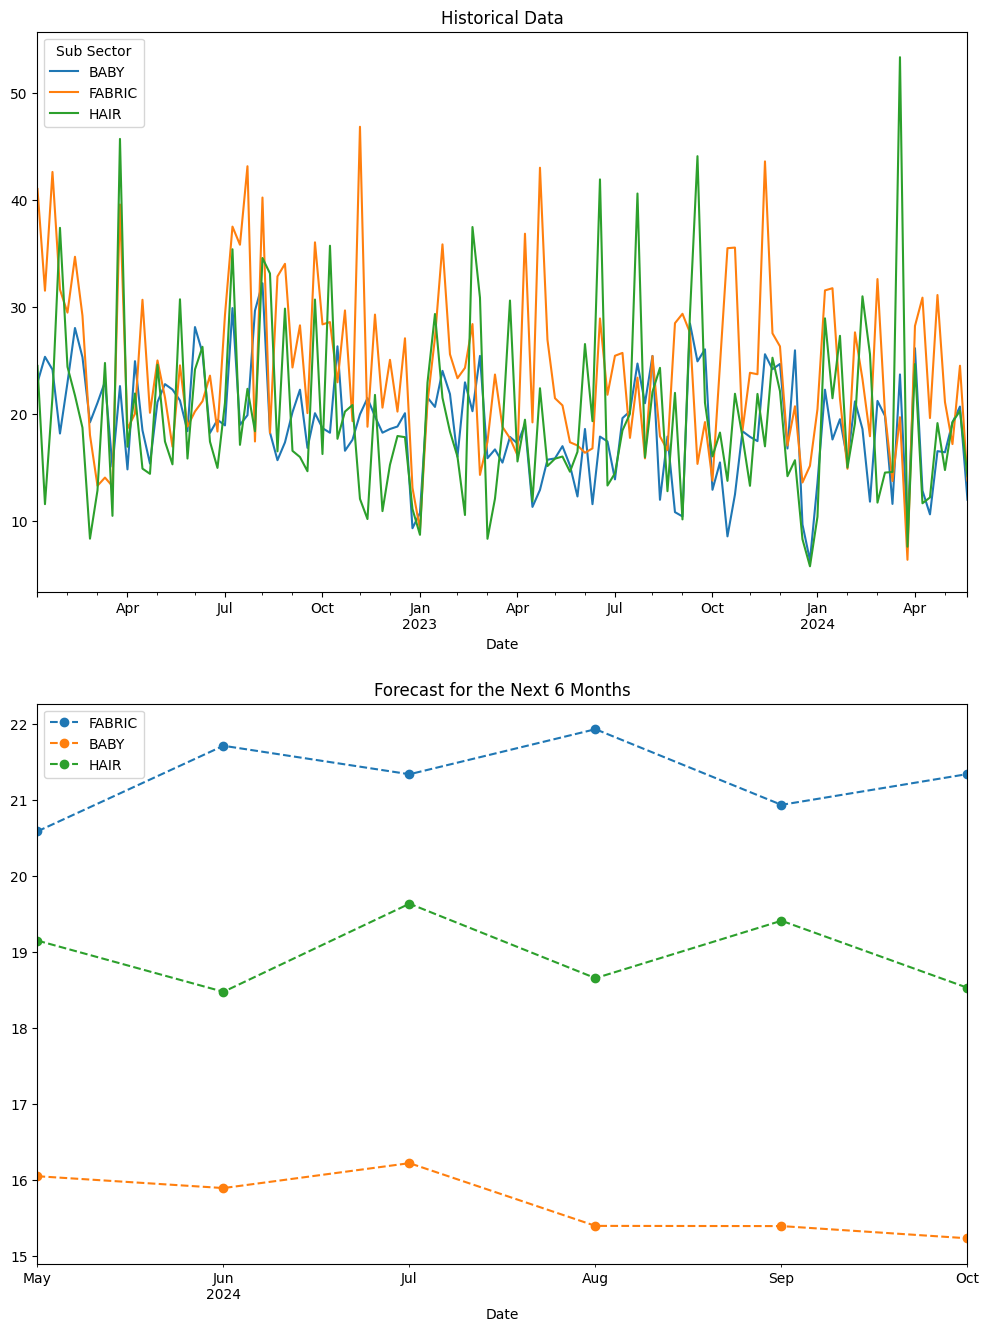

Final MAPE for FABRIC: 47.44%
Final MAPE for BABY: 24.93%
Final MAPE for HAIR: 32.38%


11:49:39 - cmdstanpy - INFO - Chain [1] start processing
11:49:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\moreno.l.5\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' i

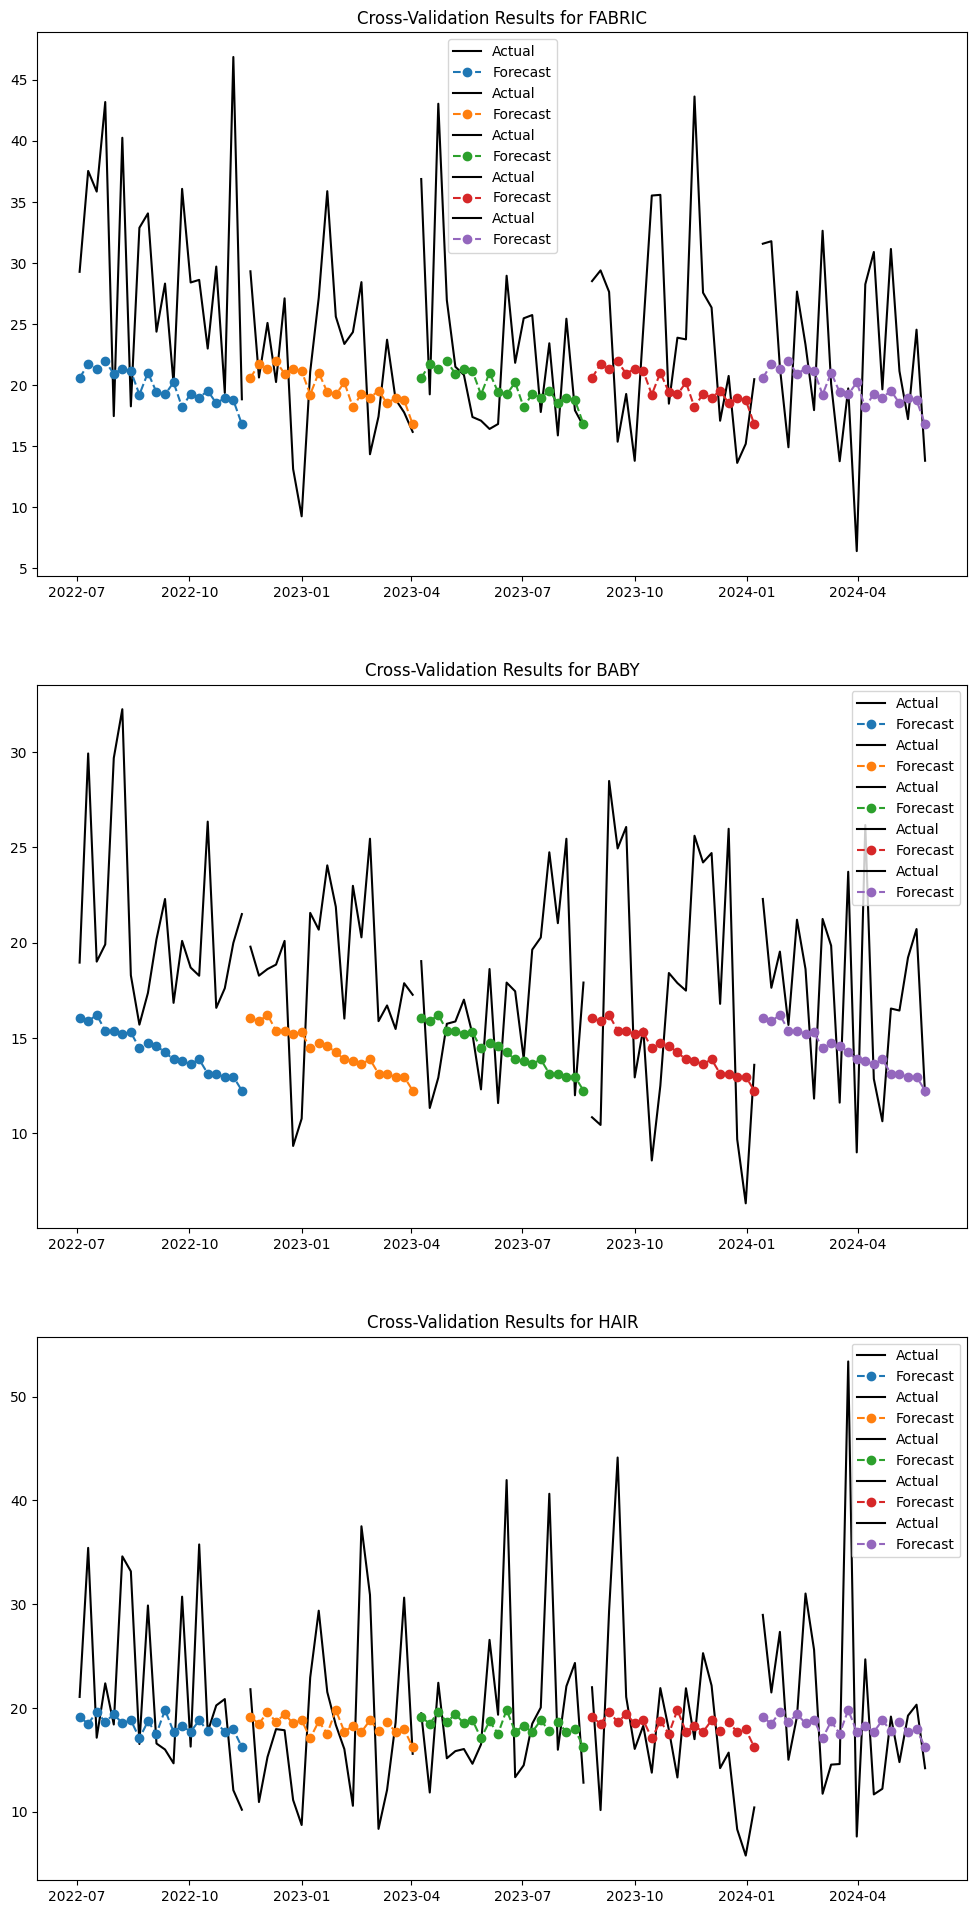

In [25]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows with missing values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Define the hierarchy based on the individual subgroups
hierarchy = {'FABRIC': ['FABRIC'], 'BABY': ['BABY'], 'HAIR': ['HAIR'], 'FEM':['FEMININE'], 'HOME':['HOME'],'ORAL':['ORAL']}

# Prepare the data
y = df.set_index('Date')

# Hyperparameter grid
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Function to fit Prophet model and calculate MAPE for cross-validation
def fit_prophet_model(train_data, test_data, params):
    model = Prophet(
        seasonality_mode=params['seasonality_mode'],
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        uncertainty_samples=500  # Reduce number of uncertainty samples
    )
    model.fit(train_data)
    
    future = model.make_future_dataframe(periods=len(test_data), freq='M')
    forecast = model.predict(future)
    
    return forecast['yhat'].tail(len(test_data))

# Perform cross-validation and hyperparameter optimization
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed
best_params = {}
best_mape = {}

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    best_group_params = None
    best_group_mape = float('inf')
    
    for seasonality_mode in param_grid['seasonality_mode']:
        for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
            for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
                params = {
                    'seasonality_mode': seasonality_mode,
                    'changepoint_prior_scale': changepoint_prior_scale,
                    'seasonality_prior_scale': seasonality_prior_scale
                }
                mape_scores = []

                for train_index, test_index in tscv.split(group_data):
                    train_data, test_data = group_data.iloc[train_index], group_data.iloc[test_index]
                    forecast_values = fit_prophet_model(train_data, test_data, params)

                    actual = test_data['y']
                    mape = mean_absolute_percentage_error(actual, forecast_values)
                    mape_scores.append(mape)

                avg_mape = np.mean(mape_scores)

                if avg_mape < best_group_mape:
                    best_group_mape = avg_mape
                    best_group_params = params
    
    best_params[group] = best_group_params
    best_mape[group] = best_group_mape
    print(f"Best params for {group}: {best_group_params}, MAPE: {best_group_mape:.2%}")

# Generate forecast for the next 6 months using best hyperparameters
forecast = pd.DataFrame()

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    best_group_params = best_params[group]
    
    model = Prophet(
        seasonality_mode=best_group_params['seasonality_mode'],
        changepoint_prior_scale=best_group_params['changepoint_prior_scale'],
        seasonality_prior_scale=best_group_params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        uncertainty_samples=500  # Reduce number of uncertainty samples
    )
    model.fit(group_data)
    
    future = model.make_future_dataframe(periods=6, freq='M')
    group_forecast = model.predict(future)
    
    forecast[group] = group_forecast.set_index('ds')['yhat'].tail(6)

# Set the index of the forecast DataFrame to datetime
forecast.index = pd.to_datetime(forecast.index)
forecast.index.name = 'Date'

# Plot the historical data and forecast
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

y.plot(ax=axes[0], title="Historical Data")
forecast.plot(ax=axes[1], linestyle='--', marker='o', title="Forecast for the Next 6 Months")

plt.show()

# Print the best MAPE values
for group, mape in best_mape.items():
    print(f"Final MAPE for {group}: {mape:.2%}")

# Cross-validation for plotting the error distribution
cv_results = {}

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    best_group_params = best_params[group]
    
    model = Prophet(
        seasonality_mode=best_group_params['seasonality_mode'],
        changepoint_prior_scale=best_group_params['changepoint_prior_scale'],
        seasonality_prior_scale=best_group_params['seasonality_prior_scale'],
        yearly_seasonality=True,
        weekly_seasonality=True,
        uncertainty_samples=500  # Reduce number of uncertainty samples
    )
    model.fit(group_data)
    
    # Perform cross-validation
    cv_results[group] = []

    for train_index, test_index in tscv.split(group_data):
        train_data, test_data = group_data.iloc[train_index], group_data.iloc[test_index]
        future = model.make_future_dataframe(periods=len(test_data), freq='M')
        forecast = model.predict(future)
        
        forecast_values = forecast['yhat'].tail(len(test_data))
        actual = test_data['y']
        
        cv_results[group].append((test_data['ds'], actual, forecast_values))

# Plot cross-validation results
fig, axes = plt.subplots(len(hierarchy), 1, figsize=(12, 8 * len(hierarchy)))

if len(hierarchy) == 1:
    axes = [axes]

for ax, (group, results) in zip(axes, cv_results.items()):
    for ds, actual, forecast_values in results:
        ax.plot(ds, actual, label='Actual', color='black')
        ax.plot(ds, forecast_values, label='Forecast', linestyle='--', marker='o')
    ax.set_title(f'Cross-Validation Results for {group}')
    ax.legend()

plt.show()

